# Titanic Survival Prediction Analysis

## Project Overview
This notebook analyzes the famous Titanic dataset to predict passenger survival using machine learning techniques. The project includes data exploration, preprocessing, feature engineering, and model comparison.

## Dataset Information
- **Source**: Titanic passenger data from Kaggle
- **Size**: 891 passengers with 12 features
- **Target**: Survival (0 = died, 1 = survived)
- **Features**: Passenger class, age, sex, fare, family size, etc.

## Methodology
1. **Data Exploration**: Understanding the dataset structure and missing values
2. **Data Preprocessing**: Handling missing values and encoding categorical variables
3. **Feature Engineering**: Creating new features and scaling numerical data
4. **Model Training**: Testing multiple algorithms (Logistic Regression, Random Forest, SVM)
5. **Hyperparameter Tuning**: Optimizing model performance using GridSearchCV
6. **Model Evaluation**: Comparing results using accuracy, confusion matrix, and classification reports

## Results
- **Best Model**:After GridSearch Logistic Regression and Random Forest Classifier have same accuracy with 80.4%
- **Key Findings**: Gender and passenger class were strong predictors of survival


In [370]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [371]:
#importing the data and overview 

train_df= pd.read_csv('Titanic-Dataset (1).csv')

In [372]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [374]:
train_df.shape

(891, 12)

In [375]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [376]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


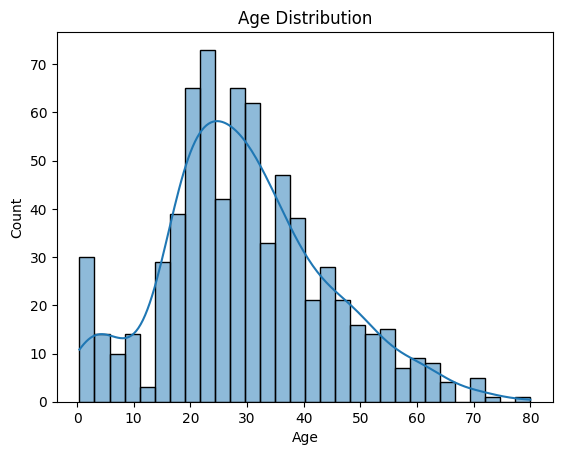

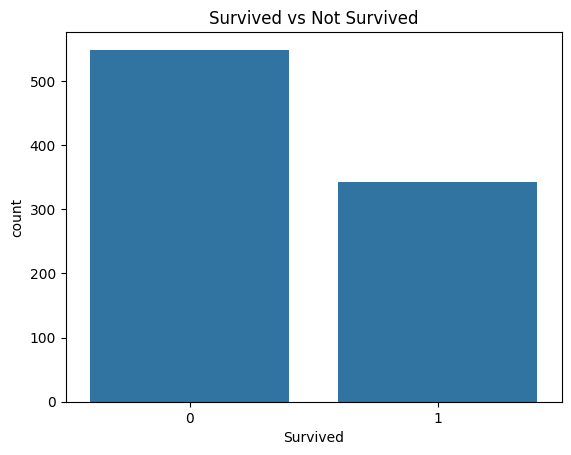

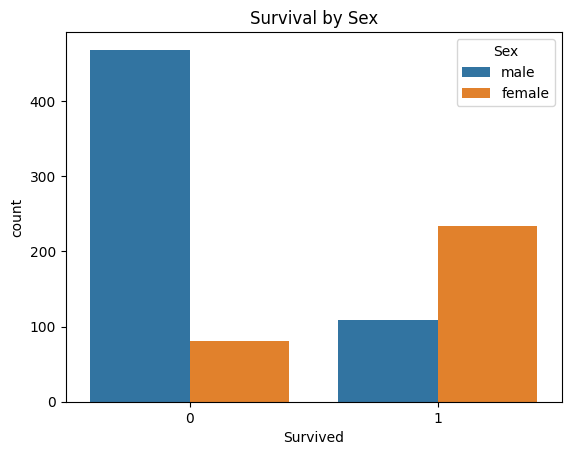

In [377]:


sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x='Survived', data=train_df)
plt.title("Survived vs Not Survived")
plt.show()

sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title("Survival by Sex")
plt.show()


In [378]:
train_df['Survived'].value_counts()

# survived = 1
# didn't survive = 0

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

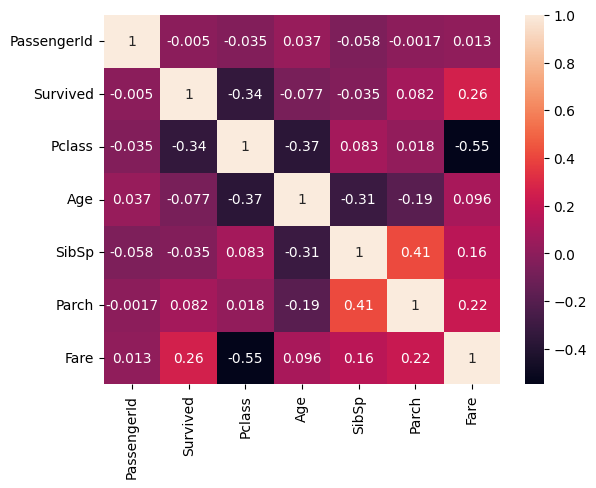

In [379]:
sns.heatmap(train_df.select_dtypes(include=[np.number]).corr(), annot=True)

In [380]:
#Data preparation
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [381]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [382]:
# filling the nans in "Age" with "mean"
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [383]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [384]:

train_df.drop(columns=['Cabin'], inplace=True)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


In [385]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [386]:
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [387]:
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [388]:

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
# Sex: male=0, female=1

train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
# One-hot encoding for Embarked

In [389]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [390]:
scaler = StandardScaler()
train_df[['Fare']] = scaler.fit_transform(train_df[['Fare']])

In [391]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,-0.502445,False,True
1,1,1,0,38.0,1,0,0.786845,False,False
2,1,3,0,26.0,0,0,-0.488854,False,True
3,1,1,0,35.0,1,0,0.420730,False,True
4,0,3,1,35.0,0,0,-0.486337,False,True


In [392]:
#spliting the dataset to work on train and test
X= train_df.drop('Survived', axis=1)
y= train_df['Survived']
X_train, X_test , y_train , y_test= train_test_split(X,y ,test_size = 0.2,random_state= 42, stratify=y)



In [393]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [394]:
y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[98 12]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [395]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7932960893854749
Confusion Matrix:
 [[96 14]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [396]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf)]     
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.793296


In [397]:
#training the model
model = SVC(random_state=42)
model.fit(X_train, y_train)



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [398]:
#predicting test
y_pred_svc = model.predict(X_test)


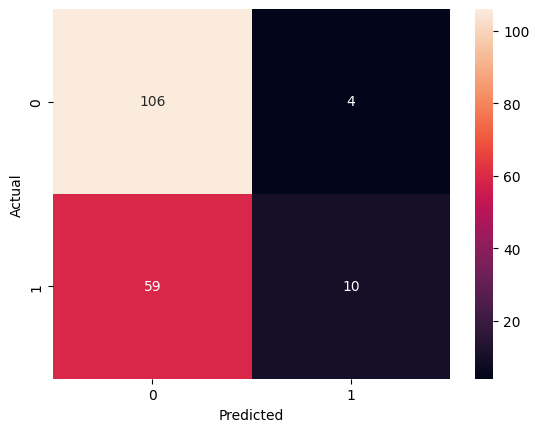

In [399]:
#applaing the confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [400]:
#print the classification_report
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.64      0.96      0.77       110
           1       0.71      0.14      0.24        69

    accuracy                           0.65       179
   macro avg       0.68      0.55      0.51       179
weighted avg       0.67      0.65      0.57       179



In [401]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVC"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc)]
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.793296
2                  SVC  0.648045


In [402]:
best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
print("Best model is:", best_model_name)

Best model is: Logistic Regression


In [403]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [404]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     
    'solver': ['liblinear', 'lbfgs'],    
    'max_iter': [1000, 200, 500]          
}
log_model = LogisticRegression(random_state=42)

grid_ = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_.fit(X_train_scaled, y_train)

print("Best parameters:", grid_.best_params_)
best_log_model = grid_.best_estimator_

Best parameters: {'C': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}


In [405]:
y_pred_log_grid = best_log_model.predict(X_test_scaled)

In [406]:
print(classification_report(y_test, y_pred_log_grid))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       110
           1       0.84      0.61      0.71        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



In [407]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [408]:
# print the best estimator (best model)
print(grid.best_estimator_)


RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)


In [409]:
# print the best params
print(grid.best_params_)


{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [410]:
y_pred_rf_grid = best_rf.predict(X_test_scaled)

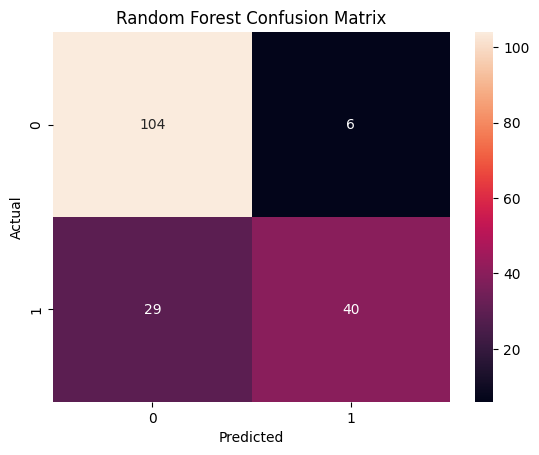

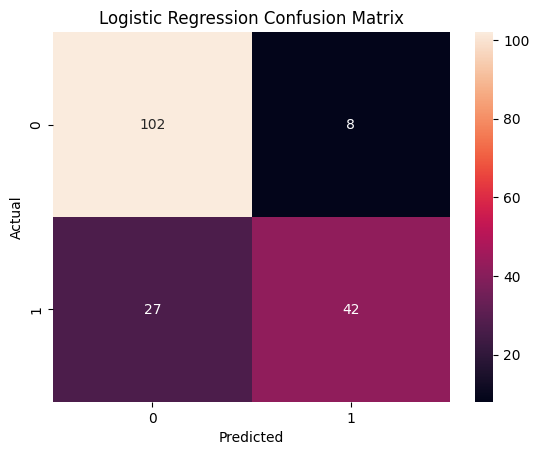

In [411]:
# print the confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_grid)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
cm = confusion_matrix(y_test, y_pred_log_grid)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [412]:
print('accuracy_score:', accuracy_score(y_test, y_pred_rf_grid))

accuracy_score: 0.8044692737430168


In [413]:
#print the classification_report
print(classification_report(y_test, y_pred_log_grid))
print(classification_report(y_test, y_pred_rf_grid))


              precision    recall  f1-score   support

           0       0.79      0.93      0.85       110
           1       0.84      0.61      0.71        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       110
           1       0.87      0.58      0.70        69

    accuracy                           0.80       179
   macro avg       0.83      0.76      0.78       179
weighted avg       0.82      0.80      0.79       179



In [414]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVC"],
    "Accuracy": [accuracy_score(y_test, y_pred_log_grid), accuracy_score(y_test, y_pred_rf_grid), accuracy_score(y_test, y_pred_svc)]
})  
print(results)

                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.804469
2                  SVC  0.648045
